In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# help from https://medium.com/analytics-vidhya/step-by-step-train-model-using-tensorflow-cnn-2f243b847c8

In [2]:
import os

from typing import Dict, List

labels: Dict[str, List[str]] = {}

for entry in os.listdir("/content/drive/MyDrive/spectrograms"):
    (label, idx) = entry.split("-")
    if labels.get(label) is None:
        labels[label] = [idx]
    else:
        labels[label].append(idx)

for (label, data) in labels.items():
    print(f"{label}: {len(data)}")

7: 195
3: 164
8: 192
2: 100
9: 115
5: 328
1: 17
4: 140
0: 145
6: 274


In [3]:
!pip install opencv-python


In [4]:

import cv2 as cv
import os

LABELS = [
    "air_conditioner",
    "car_horn",
    "children_playing",
    "dog_bark",
    "drilling",
    "engine_idling",
    "gun_shot",
    "jackhammer",
    "siren",
    "street_music"
]

IMG_WIDTH = 610
IMG_HEIGHT = 450

X_TRAIN = []
Y_TRAIN = []

IMG_SIZE = 256

for (label, ids) in labels.items():
    for idx in ids:
        try:
            path = os.path.join("/content/drive/MyDrive/spectrograms", f"{label}-{idx}")
            img_array = cv.imread(path)
            new_array = cv.resize(img_array, (IMG_SIZE, IMG_SIZE))
            X_TRAIN.append(new_array)
            Y_TRAIN.append(int(label))

        except Exception as e:
            print(e)
            pass

# print(f"{LABELS[int(label)]}: {len(idx)}")


In [5]:
import numpy as np
X_TRAIN = np.array(X_TRAIN).reshape(-1, IMG_SIZE, IMG_SIZE,3)
Y_TRAIN = np.array(Y_TRAIN)
X_TRAIN = X_TRAIN/255

print(len(X_TRAIN))

1670


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 107.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.6 MB/s eta 0:00:00


In [7]:
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras import utils, models, layers

model = models.Sequential([
    # 1st Convolution layer with 32 filters.
    layers.Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=X_TRAIN.shape[1:]),
    layers.Conv2D(32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # 2nd Convolution layer with 64 filters
    layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # 3rd Convolution layer with 64 filters
    layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Classifier layer
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax'),
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,699,498 (128.55 MB)

 Trainable params: 33,699,498 (128.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
import tensorflow as tf
Y_TRAIN = tf.keras.utils.to_categorical(Y_TRAIN, num_classes=10)

model.fit(X_TRAIN,Y_TRAIN, epochs=7, validation_split=0.3)

Epoch 1/7
37/37 ━━━━━━━━━━━━━━━━━━━━ 383s 10s/step - accuracy: 0.2402 - loss: 2.1272 - val_accuracy: 0.0000e+00 - val_loss: 7.7499
Epoch 2/7
37/37 ━━━━━━━━━━━━━━━━━━━━ 377s 10s/step - accuracy: 0.4870 - loss: 1.6865 - val_accuracy: 0.0000e+00 - val_loss: 6.3445
Epoch 3/7
37/37 ━━━━━━━━━━━━━━━━━━━━ 378s 10s/step - accuracy: 0.6330 - loss: 1.0422 - val_accuracy: 0.0459 - val_loss: 8.5441
Epoch 4/7
37/37 ━━━━━━━━━━━━━━━━━━━━ 377s 10s/step - accuracy: 0.7352 - loss: 0.7768 - val_accuracy: 0.0599 - val_loss: 8.2808
Epoch 5/7
37/37 ━━━━━━━━━━━━━━━━━━━━ 378s 10s/step - accuracy: 0.7923 - loss: 0.6450 - val_accuracy: 0.0719 - val_loss: 11.1659
Epoch 6/7
37/37 ━━━━━━━━━━━━━━━━━━━━ 377s 10s/step - accuracy: 0.8523 - loss: 0.4203 - val_accuracy: 0.0679 - val_loss: 11.8307
Epoch 7/7
37/37 ━━━━━━━━━━━━━━━━━━━━ 378s 10s/step - accuracy: 0.8932 - loss: 0.3126 - val_accuracy: 0.0519 - val_loss: 7.5398


In [ ]:
model.save("cnn.keras")

In [8]:
model.load_weights("drive/MyDrive/University/Final Year Project/cnn.keras")

In [27]:
element = 500

expected = Y_TRAIN[element]
prediction = model.predict(X_TRAIN[element].reshape(1, 256, 256, 3))
predicted_class = np.argmax(prediction, axis=1)

print(LABELS[predicted_class[0]], LABELS[expected])
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
street_music siren
[[0.00079208 0.01100703 0.20646079 0.04059441 0.11304068 0.02104159
  0.00077615 0.08733093 0.14273044 0.37622586]]


In [15]:
predicted_class = np.argmax(prediction, axis=1)

In [18]:
print(predicted_class)

[7]


In [ ]:
print(Y_TRAIN[0])

class_id = 5
ix = np.where(Y_TRAIN == class_id)[0]
print(ix)

for class_zero_idx in ix:
    prediction = model.predict(X_TRAIN[class_zero_idx].reshape(1, 256, 256, 3))
    predicted_class = np.argmax(prediction, axis=1)

    print(f"predicted: {LABELS[predicted_class[0]]}, actual: {LABELS[class_id]}")
    # print(prediction)


In [22]:
predictions = model.predict(X_TRAIN)


53/53 ━━━━━━━━━━━━━━━━━━━━ 191s 4s/step


In [23]:
predicted_labels = np.argmax(predictions, axis=1)


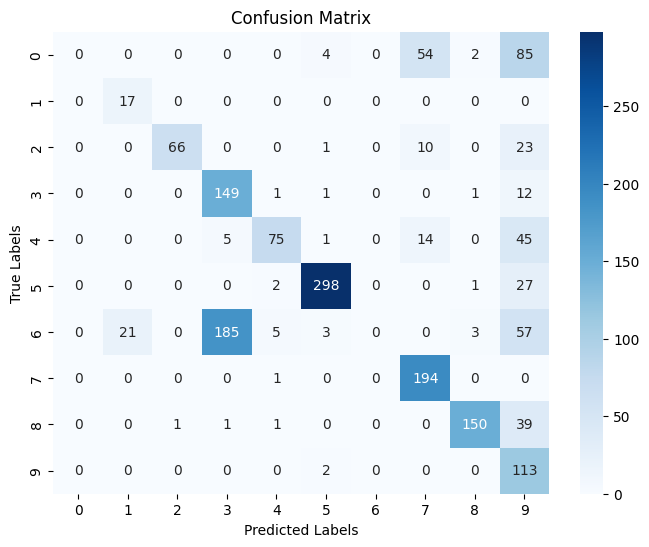

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

true_labels = Y_TRAIN
# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()